In [2]:
'''W16D8 - Esame finale - Analisi diffusione COVID-19 nel mondo'''

#TASK 1
'''Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, 
richiede di utilizzare il dataset,curato da Our World in Data,all'indirizzo 
https://github.com/owid/covid-19-data/tree/master/public/data; alla voce "🗂 dataset" 
scaricare il dataset nel formato che si preferisce.'''

import pandas as pd
covid_19 = pd.read_csv ("COVID_DATA.csv")

In [7]:
#TASK 2
"""Si richiede di verificare le dimensioni del dataset e i relativi metadati."""
covid_19 = pd.read_csv ("COVID_DATA.csv")
covid_19.shape
#attributo .shape restituisce una coppia di numeri, il primo è il n. di righe e il secondo è il n. delle colonne.
#rappresentano la dimensionalità del dataset.

(429435, 67)

In [11]:
# TASK 3
""" Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente."""

covid_19_continent = covid_19[covid_19['continent'].notna()]

cases_by_continent = covid_19_continent.groupby('continent')['total_cases'].sum()
print(cases_by_continent)


continent
Africa           1.461689e+10
Asia             2.521673e+11
Europe           2.367567e+11
North America    1.270737e+11
Oceania          1.159805e+10
South America    7.348457e+10
Name: total_cases, dtype: float64


In [14]:
#TASK 4
""" Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, 
ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo 
(calcolati anche sulle locazioni senza indicazione di continente)."""

#assegnazione due variabili
continent_1 = 'Europe'
continent_2 = 'South America'

#totale casi nel mondo
total_cases_world = covid_19['total_cases'].sum()

#calcoli per il continente Europe
continent_1_cases = covid_19_continent[covid_19_continent['continent'] == continent_1]['total_cases']
max_continent_1 = continent_1_cases.max()
mean_continent_1 = continent_1_cases.mean()
percent_continent_1 = (continent_1_cases.sum() / total_cases_world) * 100

#calcoli per il continente South America
continent_2_cases = covid_19_continent[covid_19_continent['continent'] == continent_2]['total_cases']
max_continent_2 = continent_2_cases.max()
mean_continent_2 = continent_2_cases.mean()
percent_continent_2 = (continent_2_cases.sum() / total_cases_world) * 100

#confronto descrittori statistici: massimo, media e percentuale
print(f"Confronto tra {continent_1} e {continent_2}:")
print(f"{continent_1} - Massimo: {max_continent_1}, Media: {mean_continent_1}, Percentuale: {percent_continent_1}%")
print(f"{continent_2} - Massimo: {max_continent_2}, Media: {mean_continent_2}, Percentuale: {percent_continent_2}%")


Confronto tra Europe e South America:
Europe - Massimo: 38997490.0, Media: 2773170.803183639, Percentuale: 7.805876897317327%
South America - Massimo: 37511921.0, Media: 3135542.345238095, Percentuale: 2.4227890860822545%


/var/folders/cn/mqsn4fyx7x7gvsznhkklmp340000gn/T/ipykernel_18699/2800626281.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_italy_2022['date'] = pd.to_datetime(covid_19_italy_2022['date'])


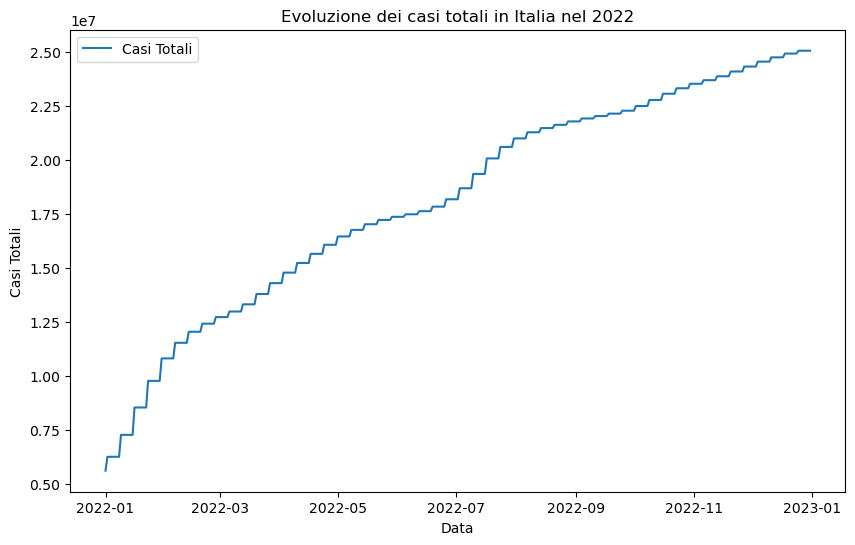

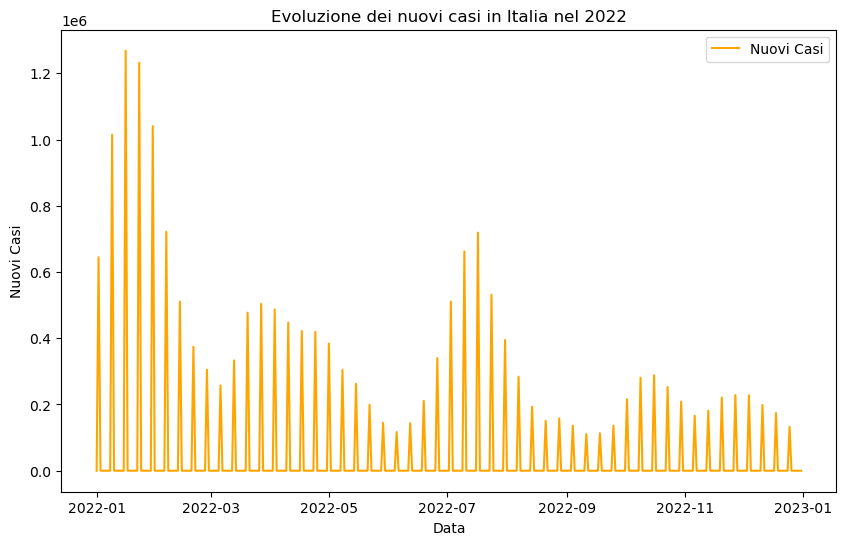

/var/folders/cn/mqsn4fyx7x7gvsznhkklmp340000gn/T/ipykernel_18699/2800626281.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_italy_2022['cumulative_new_cases'] = covid_19_italy_2022['new_cases'].cumsum()


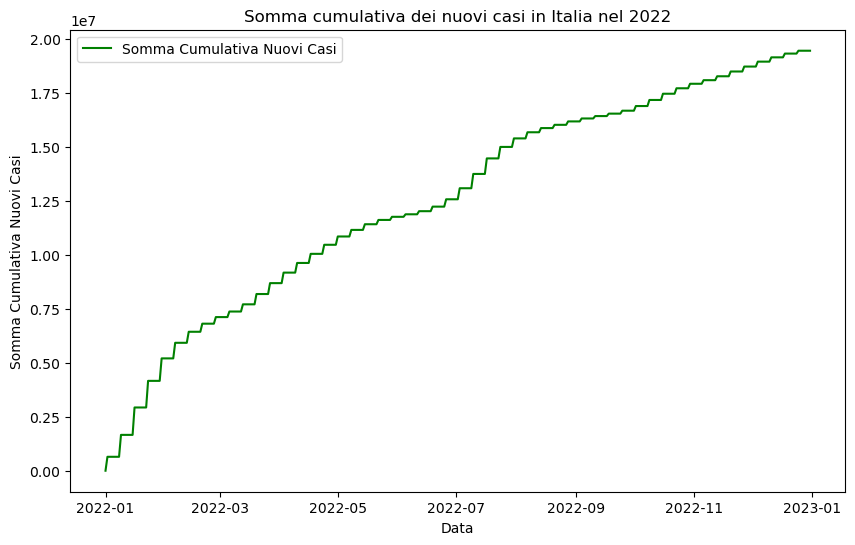

In [22]:
#TASK 5
"""Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, 
e commentare se ci sono similarità con l'andamento del numero dei casi totali."""

import matplotlib.pyplot as plt

# Filtra i dati per l'Italia e per l'anno 2022
covid_19_italy_2022 = covid_19[(covid_19['location'] == 'Italy') & (covid_19['date'].str.contains('2022'))]

# Convertire la colonna delle date in formato datetime
covid_19_italy_2022['date'] = pd.to_datetime(covid_19_italy_2022['date'])

# Plot dell'evoluzione dei casi totali
plt.figure(figsize=(10, 6))
plt.plot(covid_19_italy_2022['date'], covid_19_italy_2022['total_cases'], label='Casi Totali')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.legend()
plt.show()

# Plot dei nuovi casi giornalieri
plt.figure(figsize=(10, 6))
plt.plot(covid_19_italy_2022['date'], covid_19_italy_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.title('Evoluzione dei nuovi casi in Italia nel 2022')
plt.legend()
plt.show()

# Somma cumulativa dei nuovi casi
covid_19_italy_2022['cumulative_new_cases'] = covid_19_italy_2022['new_cases'].cumsum()

# Plot della somma cumulativa dei nuovi casi
plt.figure(figsize=(10, 6))
plt.plot(covid_19_italy_2022['date'], covid_19_italy_2022['cumulative_new_cases'], label='Somma Cumulativa Nuovi Casi', color='green')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa Nuovi Casi')
plt.title('Somma cumulativa dei nuovi casi in Italia nel 2022')
plt.legend()
plt.show()

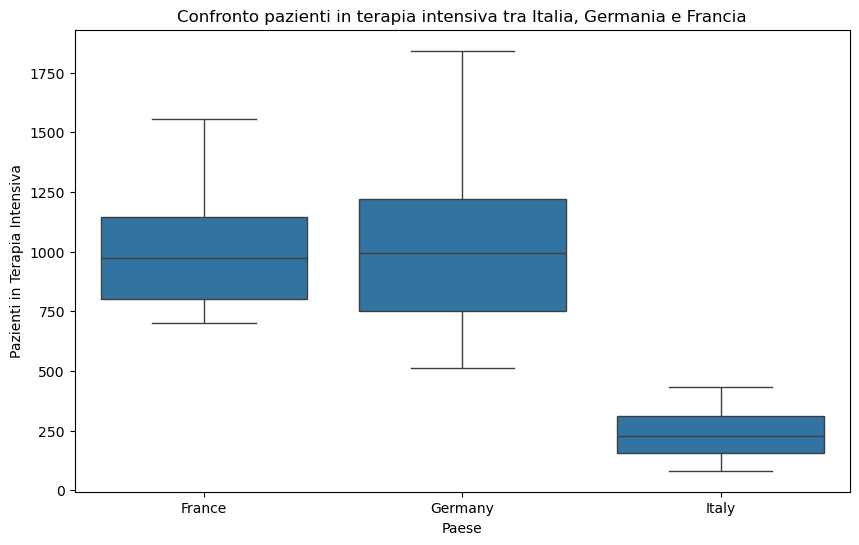

In [25]:
#TASK 6
"""Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni 
riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), 
e scrivere un breve commento a riguardo."""

import seaborn as sns

#Filtra i dati da maggio 2022 ad aprile 2023 per Italia, Germania e Francia
covid_19_icu = covid_19[(covid_19['location'].isin(['Italy', 'Germany', 'France'])) & 
            (covid_19['date'] >= '2022-05-01') & (covid_19['date'] <= '2023-04-30')]

# Boxplot per il confronto del numero di pazienti in terapia intensiva
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=covid_19_icu)
plt.title('Confronto pazienti in terapia intensiva tra Italia, Germania e Francia')
plt.xlabel('Paese')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.show()

In [30]:
#TASK 7
"""Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — 
se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno."""

# Filtro dei dati per il 2023 e per le nazioni specificate
covid_19_hosp_2023 = covid_19[(covid_19['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (covid_19['date'].str.contains('2023'))]

# Gestione dei valori nulli
covid_19_hosp_2023['hosp_patients'] = covid_19_hosp_2023['hosp_patients'].fillna(0)

# Somma dei pazienti ospedalizzati per nazione
hosp_patients_sum = covid_19_hosp_2023.groupby('location')['hosp_patients'].sum()
print(hosp_patients_sum)

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


/var/folders/cn/mqsn4fyx7x7gvsznhkklmp340000gn/T/ipykernel_18699/1345731199.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_hosp_2023['hosp_patients'] = covid_19_hosp_2023['hosp_patients'].fillna(0)
